In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('IMDB Dataset.csv')
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [4]:
data.isnull().sum()

review       0
sentiment    0
dtype: int64

In [5]:
data.replace(['positive', 'negative'], [1,0], inplace = True)

In [6]:
data.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,1
1,A wonderful little production. <br /><br />The...,1
2,I thought this was a wonderful way to spend ti...,1
3,Basically there's a family where a little boy ...,0
4,"Petter Mattei's ""Love in the Time of Money"" is...",1


In [7]:
positive = data[data.sentiment == 1].sample(n = 1)['review'].iloc[0]
positive

'This film always hits me hard emotionally at the end. Though the issues of the film - interracial romance and adultery - were controversial at the time, this film goes way beyond those narrow parameters of ground breaking novelty and trail blazing uniqueness. Here we have a true love story, as written by the woman involved in this love affair, told in a brilliant aggressive style that extols the virtues and glory of mad passionate love. I "love" this endorsement of the only emotion that makes life truly worth living. Jennifer Jones is full of grace and William Holden is simply magnificent in his role as a reporter. A wonderful film that only people who have been in this kind of love can really appreciate and understand. And for those who haven\'t yet been in love, even just the hope that one day lightning can strike for you makes life worth living - because love is worth having even if but for a short time - even if you lose - because love is the "stuff" - the essence - of life. This 

In [8]:
negative = data[data.sentiment == 0].sample(n = 1)['review'].iloc[0]
negative

'The first film I saw from these people was "Children of the Grave" and when I heard that this one was coming on I thought it would be good to watch mostly because Waverly is a real place that is rumored to be haunted. This documentary/film was AWFUL! There was too much fake commentary from the producers, directors, camera men...they needed to keep their faces out of this film. Waverly has been rumored to be haunted for a long time yet if anyone in doubt about it watches this film they will no doubt start to believe that every story about the place is as fake as this documentary. The paranormal proof was horrible and almost non-existent. I have heard better EVPs from high school students with tape recorders in a bathroom! They tried too hard to make things scary and the end result was that nothing was scary. Not the stories, not the blurry too dark to see anything videos, not the pictures, not the tape recordings! Children of the Grave was bad as well but at least it had some substance

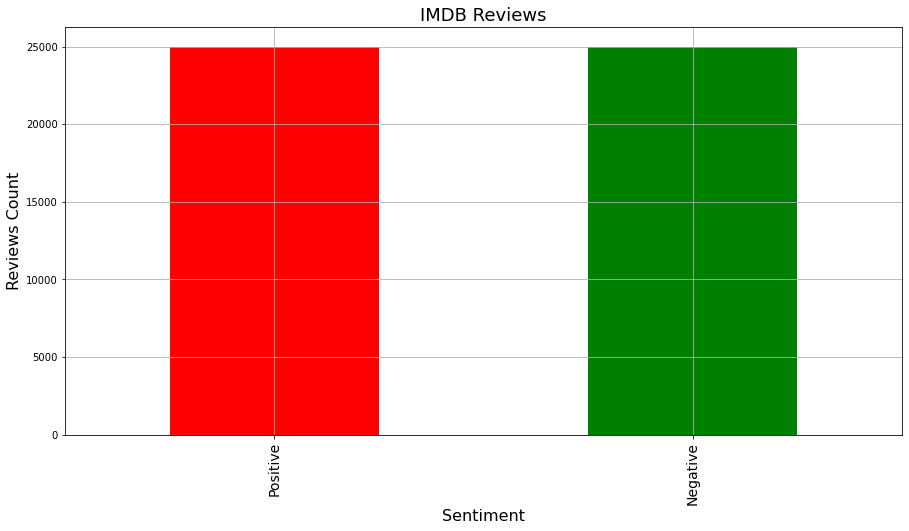

In [9]:
fig, axs = plt.subplots(figsize = (15,7.5))

data['sentiment'].value_counts().plot.bar(color = ['red', 'green'])

plt.xticks(np.arange(2), ('Positive', 'Negative'), fontsize = 14)
axs.set_title('IMDB Reviews', fontsize = 18)
axs.set_xlabel('Sentiment', fontsize = 16)
axs.set_ylabel('Reviews Count', fontsize = 16)
axs.grid()
plt.show()

In [10]:
data.sentiment.value_counts()

0    25000
1    25000
Name: sentiment, dtype: int64

In [11]:
sample = data.head(10)

In [12]:
sample.drop(columns = 'sentiment')

,review
0,One of the other reviewers has mentioned that ...
1,A wonderful little production. <br /><br />The...
2,I thought this was a wonderful way to spend ti...
3,Basically there's a family where a little boy ...
4,"Petter Mattei's ""Love in the Time of Money"" is..."
5,"Probably my all-time favorite movie, a story o..."
6,I sure would like to see a resurrection of a u...
7,"This show was an amazing, fresh & innovative i..."
8,Encouraged by the positive comments about this...
9,If you like original gut wrenching laughter yo...


In [13]:
doc = []
for text in sample.values:
    doc.append(text)

In [14]:
for i in doc:
    print(doc)

[array(["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due t

In [15]:
sample.to_csv('document_reviews.txt')

In [16]:
data.review

0        One of the other reviewers has mentioned that ...
1        A wonderful little production. <br /><br />The...
2        I thought this was a wonderful way to spend ti...
3        Basically there's a family where a little boy ...
4        Petter Mattei's "Love in the Time of Money" is...
                               ...                        
49995    I thought this movie did a down right good job...
49996    Bad plot, bad dialogue, bad acting, idiotic di...
49997    I am a Catholic taught in parochial elementary...
49998    I'm going to have to disagree with the previou...
49999    No one expects the Star Trek movies to be high...
Name: review, Length: 50000, dtype: object

In [17]:
data1 = []
for review in data.review.values:
    data1.append((review))

In [18]:
data['review'] = data1

In [19]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [20]:
stop_words = set(stopwords.words('english'))

In [21]:
stopwords = stop_words.remove('not')

In [22]:
import re

In [23]:
preprocessed_review = []
for i in range(len(data.review)):
    cleaning = re.compile('<.*?>')                          # Pattern for removing html tags
    cleaning1 = re.compile('[^aA-zZ0-9]+')                  # Pattern for removing all the punctuations, commas, and other characters which can act as noise in data
    review = re.sub(cleaning, '', data.review.iloc[i])      # First substituing all the html tags with empty space
    review = re.sub(cleaning1, ' ', review)                 # Then substitutin all irrelevant characters with a single space
    
    review = review.lower()                                 # Converting all the text in reviews to lower case
    
    tokens = word_tokenize(review)                          # Splitting the reviews into individual words (tokenization)
    
    del review
    
    swords = []                                             # An empty list for storing all the words except stop words
    for word in tokens:
        if word not in stop_words:
            swords.append(word)
    del tokens
    
    lemmatizer = WordNetLemmatizer()                        # Normalization (Lemmatization)
    
    lemmas = []
    for lemma in swords:
        norm = lemmatizer.lemmatize(lemma)
        lemmas.append(norm)
    
    del swords
    
    lemmas = ' '.join(lemmas)
    preprocessed_review.append(lemmas)


In [24]:
print(preprocessed_review[1])

wonderful little production filming technique unassuming old time bbc fashion give comforting sometimes discomforting sense realism entire piece actor extremely well chosen michael sheen not got polari voice pat truly see seamless editing guided reference williams diary entry not well worth watching terrificly written performed piece masterful production one great master comedy life realism really come home little thing fantasy guard rather use traditional dream technique remains solid disappears play knowledge sens particularly scene concerning orton halliwell set particularly flat halliwell mural decorating every surface terribly well done


In [25]:
len(preprocessed_review)

50000

In [26]:
data['preprocessed_review'] = preprocessed_review

In [27]:
data.head(5)

,review,sentiment,preprocessed_review
0,One of the other reviewers has mentioned that ...,1,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,1,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,1,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,0,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",1,petter mattei love time money visually stunnin...


In [28]:
y = data['sentiment']
y.head()

0    1
1    1
2    1
3    0
4    1
Name: sentiment, dtype: int64

In [29]:
X = data.drop(['sentiment'], axis = 1)
X.head()

,review,preprocessed_review
0,One of the other reviewers has mentioned that ...,one reviewer mentioned watching 1 oz episode h...
1,A wonderful little production. <br /><br />The...,wonderful little production filming technique ...
2,I thought this was a wonderful way to spend ti...,thought wonderful way spend time hot summer we...
3,Basically there's a family where a little boy ...,basically family little boy jake think zombie ...
4,"Petter Mattei's ""Love in the Time of Money"" is...",petter mattei love time money visually stunnin...


In [30]:
X.shape

(50000, 2)

In [31]:
from sklearn.feature_extraction.text import CountVectorizer

bow_vector = CountVectorizer(min_df = 25)  # min_df parameter implies minimum number of times that a word appears in corpus
                                           # it accepts an integer value (n) and then vectorizes a number only if it appears n times
X_bow = bow_vector.fit_transform(X['preprocessed_review'])

bow_feature_name = bow_vector.get_feature_names()
bow_feature_name = np.array(bow_feature_name)

In [32]:
X_bow.shape

(50000, 14082)

In [33]:
bow_feature_name.shape

(14082,)

In [34]:
bow_feature_name.size

14082

In [35]:
d = pd.DataFrame(X_bow.toarray(), columns  = bow_feature_name)
d.head()

,00,000,007,01,02,06,10,100,1000,101,...,zoe,zoey,zombi,zombie,zone,zoo,zoom,zorro,zucco,zucker
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,1,0,0,0,...,0,0,0,2,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X_bow, y, test_size = 0.3, random_state = 120, shuffle = True)
print(f'shape of training data is: {xtrain.shape, ytrain.shape}')
print(f'shape of testing data is: {xtest.shape, ytest.shape}')

shape of training data is: ((35000, 14082), (35000,))
shape of testing data is: ((15000, 14082), (15000,))


In [37]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

naive = MultinomialNB()
naive.fit(xtrain, ytrain)
predictions = naive.predict(xtest)
predictions

array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [38]:
accuracy = accuracy_score(ytest, predictions)
print(f'The accuracy of our model: {accuracy}')

The accuracy of our model: 0.8502666666666666


In [39]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

In [40]:
naive_report = classification_report(ytest, predictions)
print(naive_report)

              precision    recall  f1-score   support

           0       0.84      0.86      0.85      7507
           1       0.86      0.84      0.85      7493

    accuracy                           0.85     15000
   macro avg       0.85      0.85      0.85     15000
weighted avg       0.85      0.85      0.85     15000



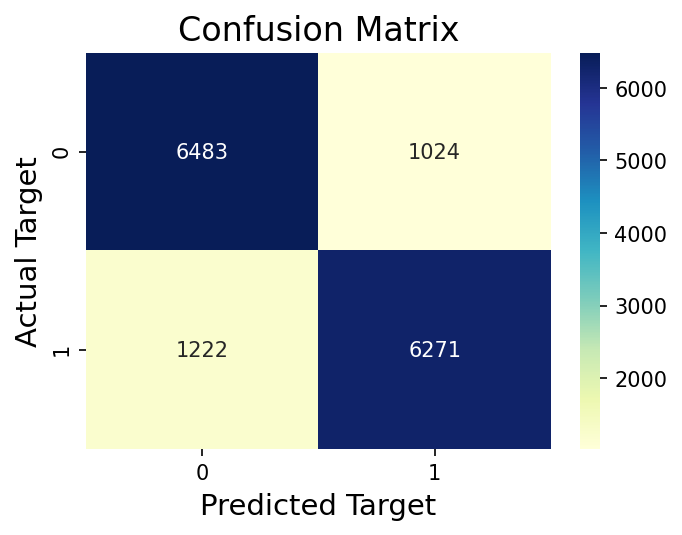

In [41]:
naive_cm = confusion_matrix(ytest, predictions)
fig,axs = plt.subplots(figsize = (5,3.5), dpi = 150)
sns.heatmap(naive_cm, annot = True, fmt = 'd', cmap="YlGnBu")
axs.set_xlabel('Predicted Target', fontsize = 14)
axs.set_ylabel('Actual Target', fontsize = 14)
axs.set_title('Confusion Matrix', fontsize = 16)
plt.style.use('dark_background')